In [1]:
#Ranges
ranges=[]

#Poinst Array
pointsArray = reshape([], 0, 0)

function generate_points(N, range1, range2)
    global ranges
    global pointsArray = zeros(Int64, N, 2)
    push!(ranges, range1)
    push!(ranges, range2)
    for i=1:N
        pointsArray[i, 1]=typemin(Int64)
        pointsArray[i, 2]=typemax(Int64)
    end
    
    i=1
    while i<=N
        flag=0
        tmpFirst = rand(ranges[1]: ranges[2])
        tmpSecond = rand(ranges[1] : ranges[2])
        for j=1:N
            if i!=j
                if pointsArray[i, 1]==tmpFirst
                    if pointsArray[i, 2]==tmpSecond
                        flag=1
                    end
                end
            end
        end
        pointsArray[i, 1]=tmpFirst
        pointsArray[i, 2]=tmpSecond
        if flag==0
            i+=1
        end
    end
    return pointsArray
end

generate_points (generic function with 1 method)

In [2]:
function calculateWay(map, N)
    sum = 0
    for i=2:N
        firstX = map[i-1, 1]
        firstY = map[i-1, 2]
        secX = map[i, 1]
        secY = map[i, 2]
        tmp = sqrt((secX-firstX)^2 + (secY-firstY)^2)
        sum += tmp
    end
    return sum
end

calculateWay (generic function with 1 method)

In [3]:
function simulatedAnnealing(mapPoints, N, T)
    while T>=1
        x0 = rand(2:N-1)
        shift = rand(0:1)
        if shift == 0
            shift -= 1
        end
        mapPointsTmp = copy(mapPoints)
        mapPointsTmp[x0,:]=mapPoints[x0+shift, :]
        mapPointsTmp[x0+ shift,:]=mapPoints[x0, :]
        delta = calculateWay(mapPointsTmp, N) - calculateWay(mapPoints, N)
        probability = exp(-delta/T)
        u= rand(Float64)
        if delta <0
            #println("yes $i, delta: $delta")
            mapPoints = copy(mapPointsTmp)
        elseif probability > u
            mapPoints = copy(mapPointsTmp)
        end
        T*=0.999
        #println(mapPoints)
    end
    return mapPoints
end

simulatedAnnealing (generic function with 1 method)

In [4]:
function simulatedAnnealing2(mapPoints, N, T)
    while T>=1
        x0= rand(1:N)
        bestEnergy=typemax(Float64)
        bestMap = copy(mapPoints)
        for j=1:N
            if x0 != j
                mapPointsTmp=copy(mapPoints)
                mapPointsTmp[x0, :]= mapPoints[j, :]
                mapPointsTmp[j, :]=mapPoints[x0, :]
                calculateEnergy = calculateWay(mapPointsTmp, N)
                if calculateEnergy < bestEnergy
                    bestEnergy = calculateEnergy
                    bestMap = copy(mapPointsTmp)
                end
            end
        end
        
        delta = calculateWay(bestMap, N) - calculateWay(mapPoints, N)
        probability = exp(-delta/T)
        u= rand(Float64)
        if delta <0
            mapPoints = copy(bestMap)
        elseif probability > u
            mapPoints = copy(bestMap)
        end
        T*=0.999
    end
    return mapPoints
end

simulatedAnnealing2 (generic function with 1 method)

# N=10

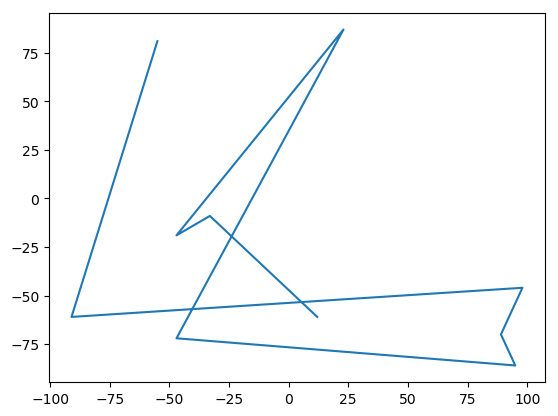

908.2218435095881


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000021BDD320>

In [5]:
using PyPlot

N=10
range1=-100
range2=100
mapPoints = generate_points(N, range1, range2)
println(calculateWay(mapPoints, N))
PyPlot.plot(mapPoints[:,1], mapPoints[:,2])

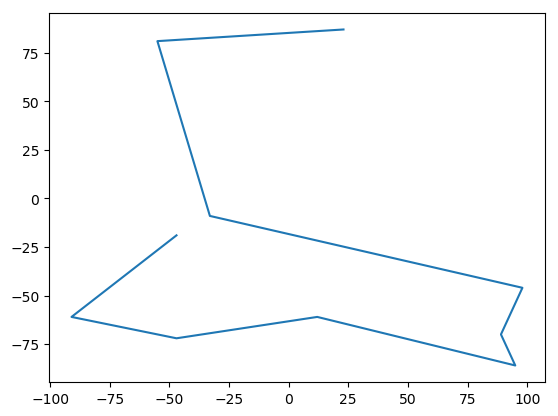

602.6070520404567


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002819C128>

In [6]:
Temperature=100
results = simulatedAnnealing(mapPoints, N, Temperature)
println(calculateWay(results, N))
PyPlot.plot(results[:,1], results[:,2])

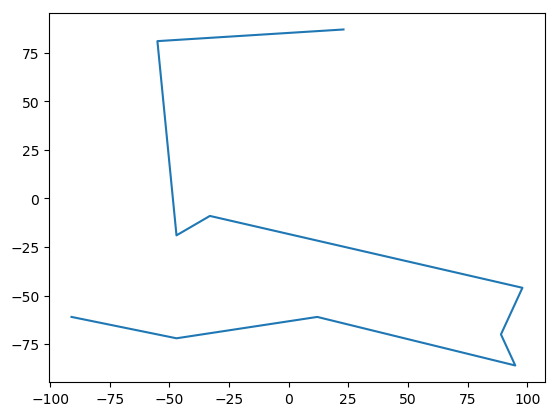

566.6536883282316


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000028465438>

In [7]:
Temperature=100
Limit=1000
results = simulatedAnnealing2(mapPoints, N, Temperature)
println(calculateWay(results, N))
PyPlot.plot(results[:,1], results[:,2])

# N=100

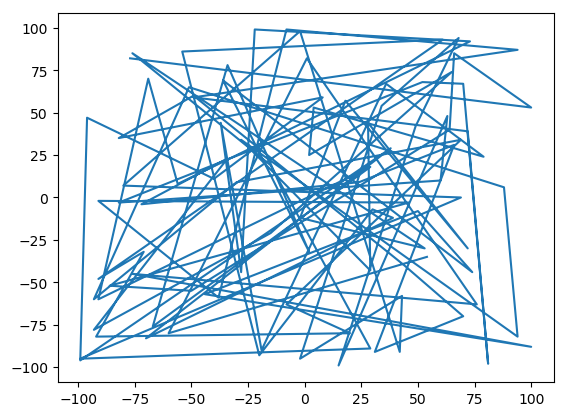

10902.767654383844


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000284CA358>

In [8]:
using PyPlot

N=100
range1=-100
range2=100
mapPoints = generate_points(N, range1, range2)
println(calculateWay(mapPoints, N))
PyPlot.plot(mapPoints[:,1], mapPoints[:,2])

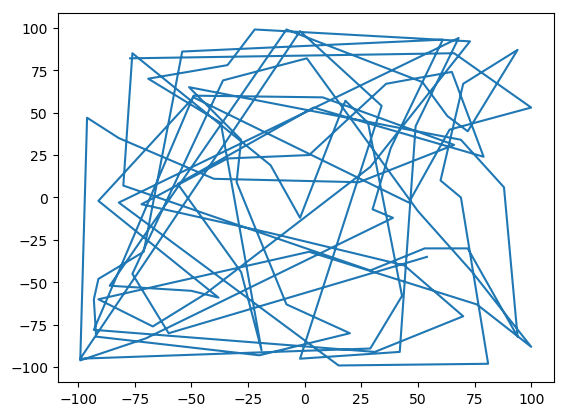

6746.12584330714


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000281D0BE0>

In [9]:
Temperature=100
results = simulatedAnnealing(mapPoints, N, Temperature)
println(calculateWay(results, N))
PyPlot.plot(results[:,1], results[:,2])

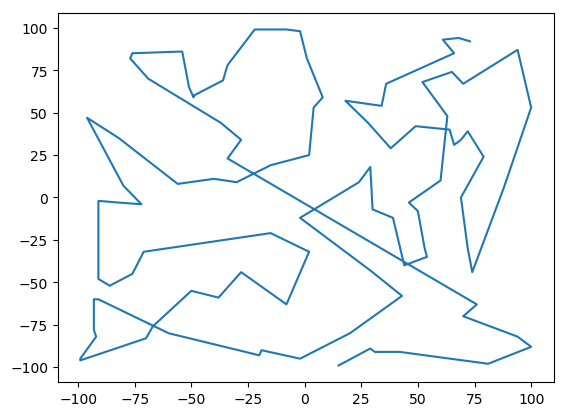

2007.0056949133843


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002823F4A8>

In [10]:
Temperature=100
results = simulatedAnnealing2(mapPoints, N, Temperature)
println(calculateWay(results, N))
PyPlot.plot(results[:,1], results[:,2])